In [ ]:
#Aim- Sucide Trend Rate Analysis

In [1]:
#importing all the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
#filter all the unwanted Warnings
import warnings
warnings.simplefilter("ignore")

In [3]:
data=pd.read_csv("/content/master.csv")
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
data.info

<bound method DataFrame.info of           country  year  ... gdp_per_capita       generation
0         Albania  1987  ...            796     Generation X
1         Albania  1987  ...            796           Silent
2         Albania  1987  ...            796     Generation X
3         Albania  1987  ...            796  G.I. Generation
4         Albania  1987  ...            796          Boomers
...           ...   ...  ...            ...              ...
27815  Uzbekistan  2014  ...           2309     Generation X
27816  Uzbekistan  2014  ...           2309           Silent
27817  Uzbekistan  2014  ...           2309     Generation Z
27818  Uzbekistan  2014  ...           2309     Generation Z
27819  Uzbekistan  2014  ...           2309          Boomers

[27820 rows x 12 columns]>

In [7]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [9]:
#check the Null Values in the dataset
data.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year         19456
 gdp_for_year            0
gdp_per_capita           0
generation               0
dtype: int64

In [10]:
#check the Unique countries in the data
data.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [11]:
data.dtypes

country               object
year                   int64
sex                   object
age                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
country-year          object
HDI for year         float64
 gdp_for_year         object
gdp_per_capita         int64
generation            object
dtype: object

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9    gdp_for_year      27820 non-null  object 
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [14]:
#Exploratory Data Analysis
data["gdp_for_year"]=data[" gdp_for_year"]
data.drop(" gdp_for_year",axis=1,inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9   gdp_per_capita     27820 non-null  int64  
 10  generation         27820 non-null  object 
 11  gdp_for_year       27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [16]:
data["gdp_for_year"]=data.gdp_for_year.str.replace(",","")

In [17]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita,generation,gdp_for_year
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,796,Generation X,2156624900
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,796,Silent,2156624900
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,796,Generation X,2156624900
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,796,G.I. Generation,2156624900
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,796,Boomers,2156624900


In [18]:
data["gdp_for_year"]=data["gdp_for_year"].astype(float)

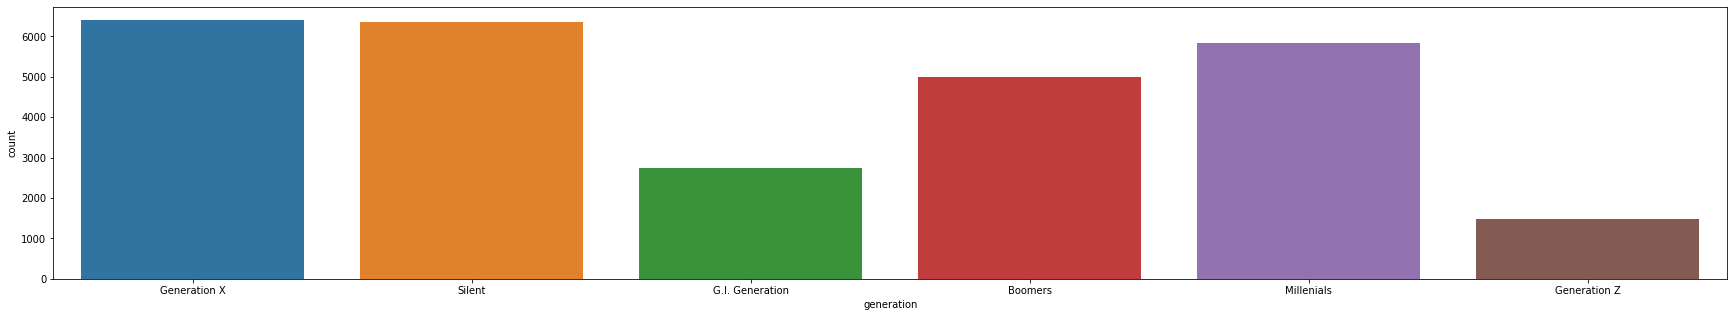

In [19]:
plt.figure(figsize=(30,5))
sns.countplot(data['generation'])

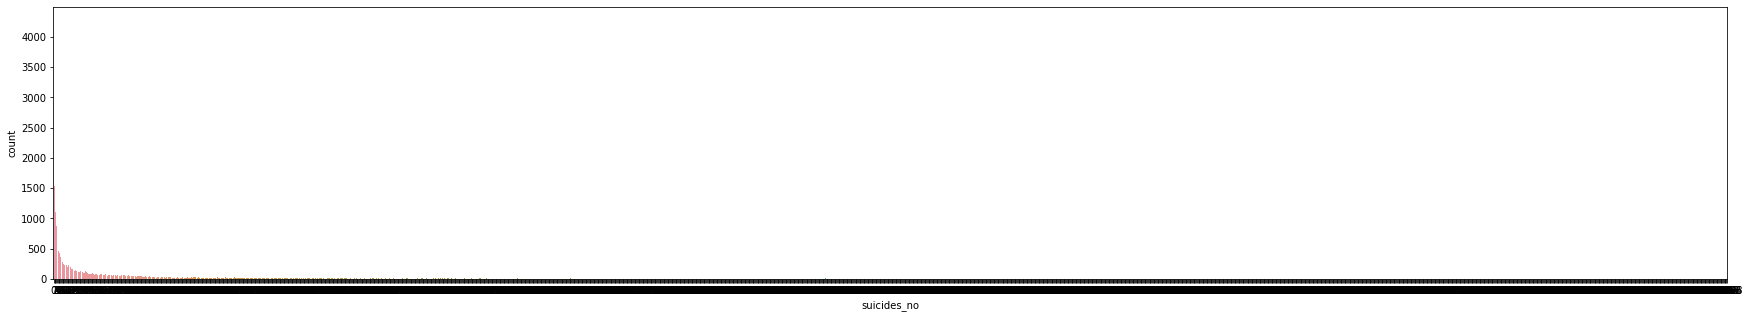

In [20]:
plt.figure(figsize=(30,5))
sns.countplot(data['suicides_no'])

In [21]:
#LABEL Encoding

from sklearn.preprocessing import LabelEncoder
label_encoder1=LabelEncoder()
data["sex"]=label_encoder1.fit_transform(data["sex"])

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder2=LabelEncoder()
data["generation"]=label_encoder2.fit_transform(data["generation"])

In [23]:
data=data.fillna(0)

In [24]:
data.drop(columns=["country","country-year","age"],axis=1,inplace=True)
data.head()

,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita,generation,gdp_for_year
0,1987,1,21,312900,6.71,0.0,796,2,2.156625e+09
1,1987,1,16,308000,5.19,0.0,796,5,2.156625e+09
2,1987,0,14,289700,4.83,0.0,796,2,2.156625e+09
3,1987,1,1,21800,4.59,0.0,796,1,2.156625e+09
4,1987,1,9,274300,3.28,0.0,796,0,2.156625e+09


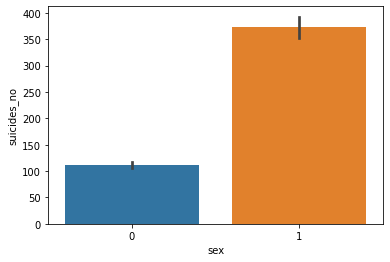

In [26]:
#Comparing the sucides between Both the sex
sns.barplot(x='sex',y='suicides_no',data=data)


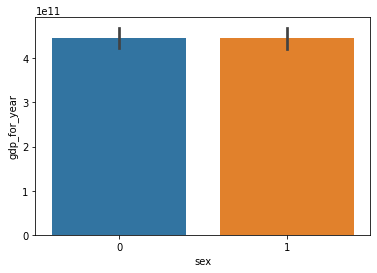

In [27]:
#Now comparing with gdp_for_year
sns.barplot(x="sex",y="gdp_for_year",data=data)

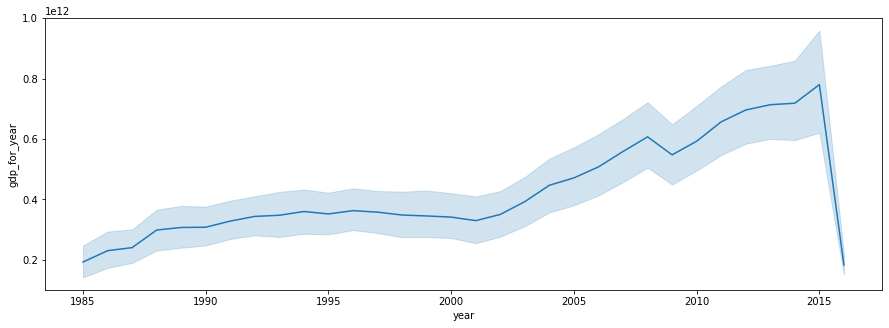

In [28]:
#Gdp trend over the given Years 

plt.figure(figsize=(15,5))
sns.lineplot(x="year",y="gdp_for_year",data=data)


In [ ]:
#Suicide Rate over the period of both the sex


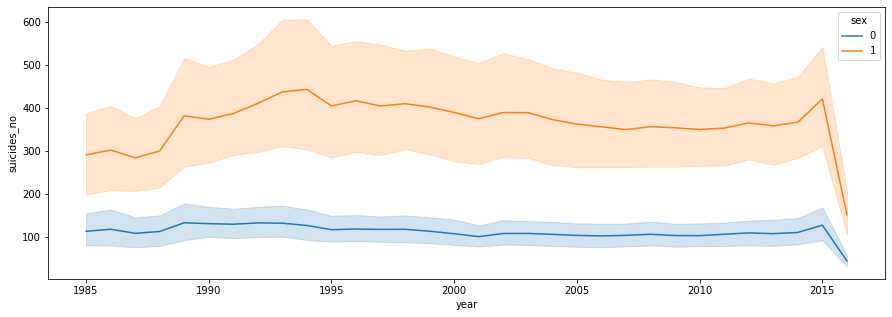

In [29]:
plt.figure(figsize=(15,5))
sns.lineplot(x="year",y="suicides_no",hue="sex",data=data)

In [30]:
data.dtypes

year                   int64
sex                    int64
suicides_no            int64
population             int64
suicides/100k pop    float64
HDI for year         float64
gdp_per_capita         int64
generation             int64
gdp_for_year         float64
dtype: object

In [31]:
#using Correlation heatmap to find important features and their relations with the other features
#correlations matrix
data.corr()

,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita,generation,gdp_for_year
year,1.000000,0.000000e+00,-0.004546,0.008850,-0.039037,3.431898e-01,3.391343e-01,2.683006e-01,9.452857e-02
sex,0.000000,1.000000e+00,0.144629,-0.011242,0.391496,3.061582e-18,1.336263e-18,-4.145525e-19,-7.757932e-19
suicides_no,-0.004546,1.446292e-01,1.000000,0.616162,0.306604,-1.730773e-02,6.132975e-02,-7.062371e-02,4.300959e-01
population,0.008850,-1.124208e-02,0.616162,1.000000,0.008285,9.374731e-03,8.150986e-02,-6.796261e-02,7.106973e-01
suicides/100k pop,-0.039037,3.914965e-01,0.306604,0.008285,1.000000,-2.290278e-02,1.785134e-03,-4.982007e-02,2.523964e-02
HDI for year,0.343190,3.061582e-18,-0.017308,0.009375,-0.022903,1.000000e+00,2.165182e-01,4.865837e-02,7.375306e-02
gdp_per_capita,0.339134,1.336263e-18,0.061330,0.081510,0.001785,2.165182e-01,1.000000e+00,8.289921e-02,3.034045e-01
generation,0.268301,-4.145525e-19,-0.070624,-0.067963,-0.049820,4.865837e-02,8.289921e-02,1.000000e+00,2.125070e-02
gdp_for_year,0.094529,-7.757932e-19,0.430096,0.710697,0.025240,7.375306e-02,3.034045e-01,2.125070e-02,1.000000e+00


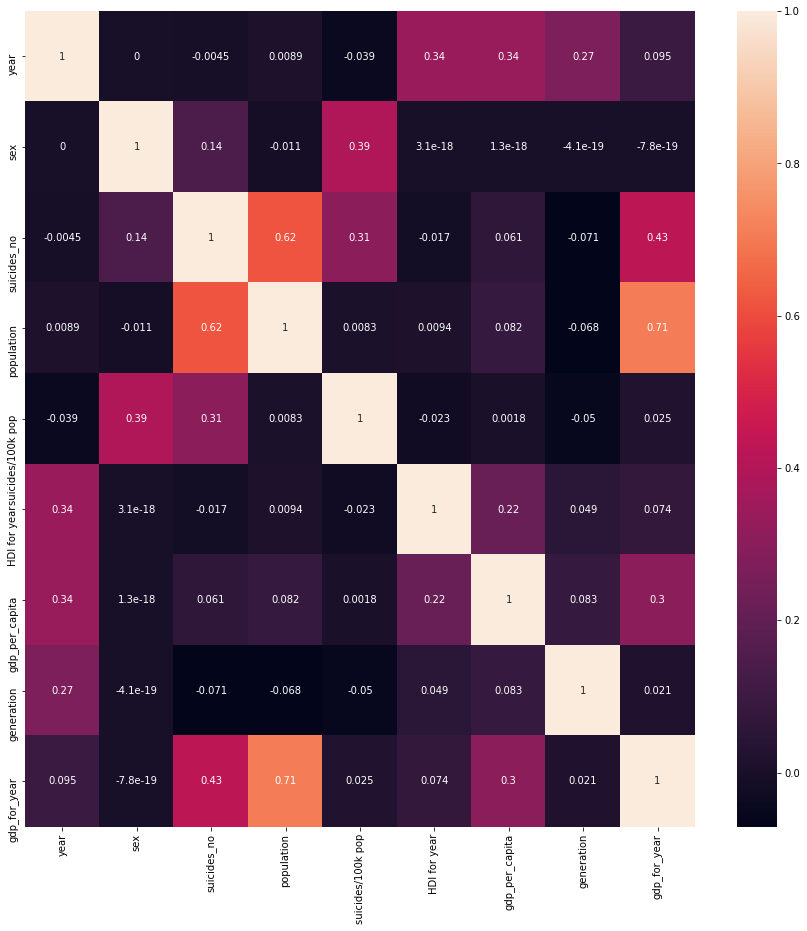

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

In [34]:
train=data.drop("suicides_no",axis=1)
test=data["suicides_no"]

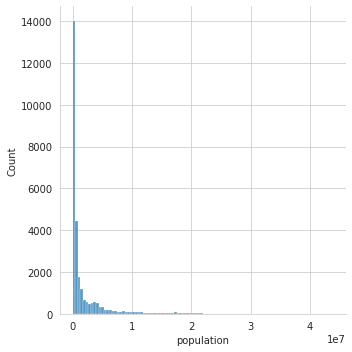

In [35]:
#density plot for population
sns.set_style('whitegrid')
sns.displot(train['population'],bins=100)

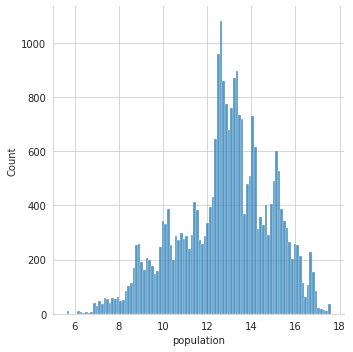

In [36]:
sns.displot(np.log(train['population']),bins=100)

In [ ]:
#studying Trends Between year and suicides Numbers


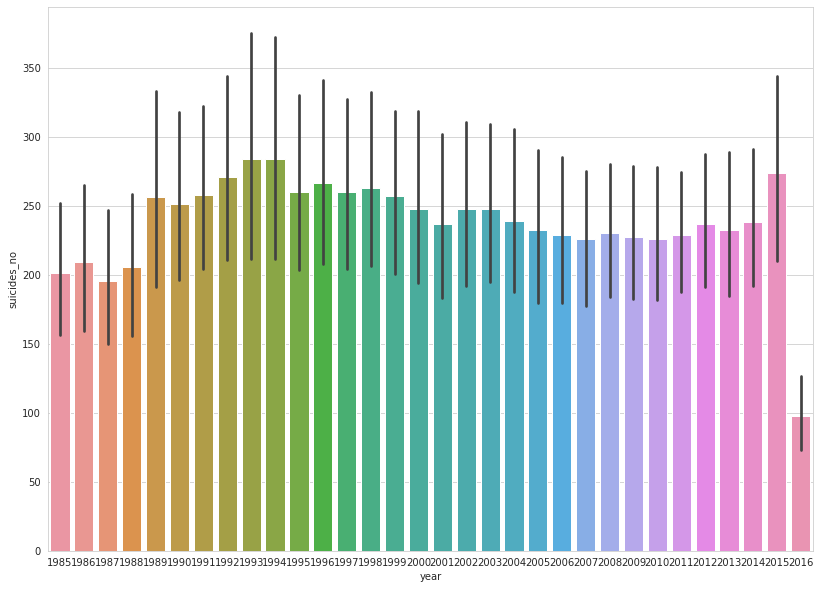

In [37]:
fig,ax=plt.subplots()
fig.set_size_inches(13.7,10,27)
sns.barplot(x="year",y="suicides_no",data=data,ax=ax)

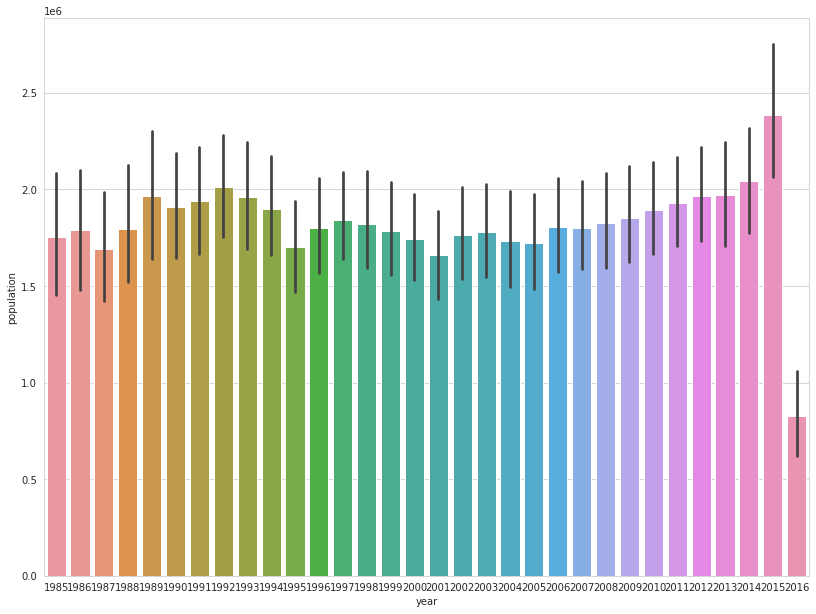

In [38]:
#studying trends between year and Population
fig,ax=plt.subplots()
fig.set_size_inches(13.7,10.27)
sns.barplot(x="year",y="population",data=train)

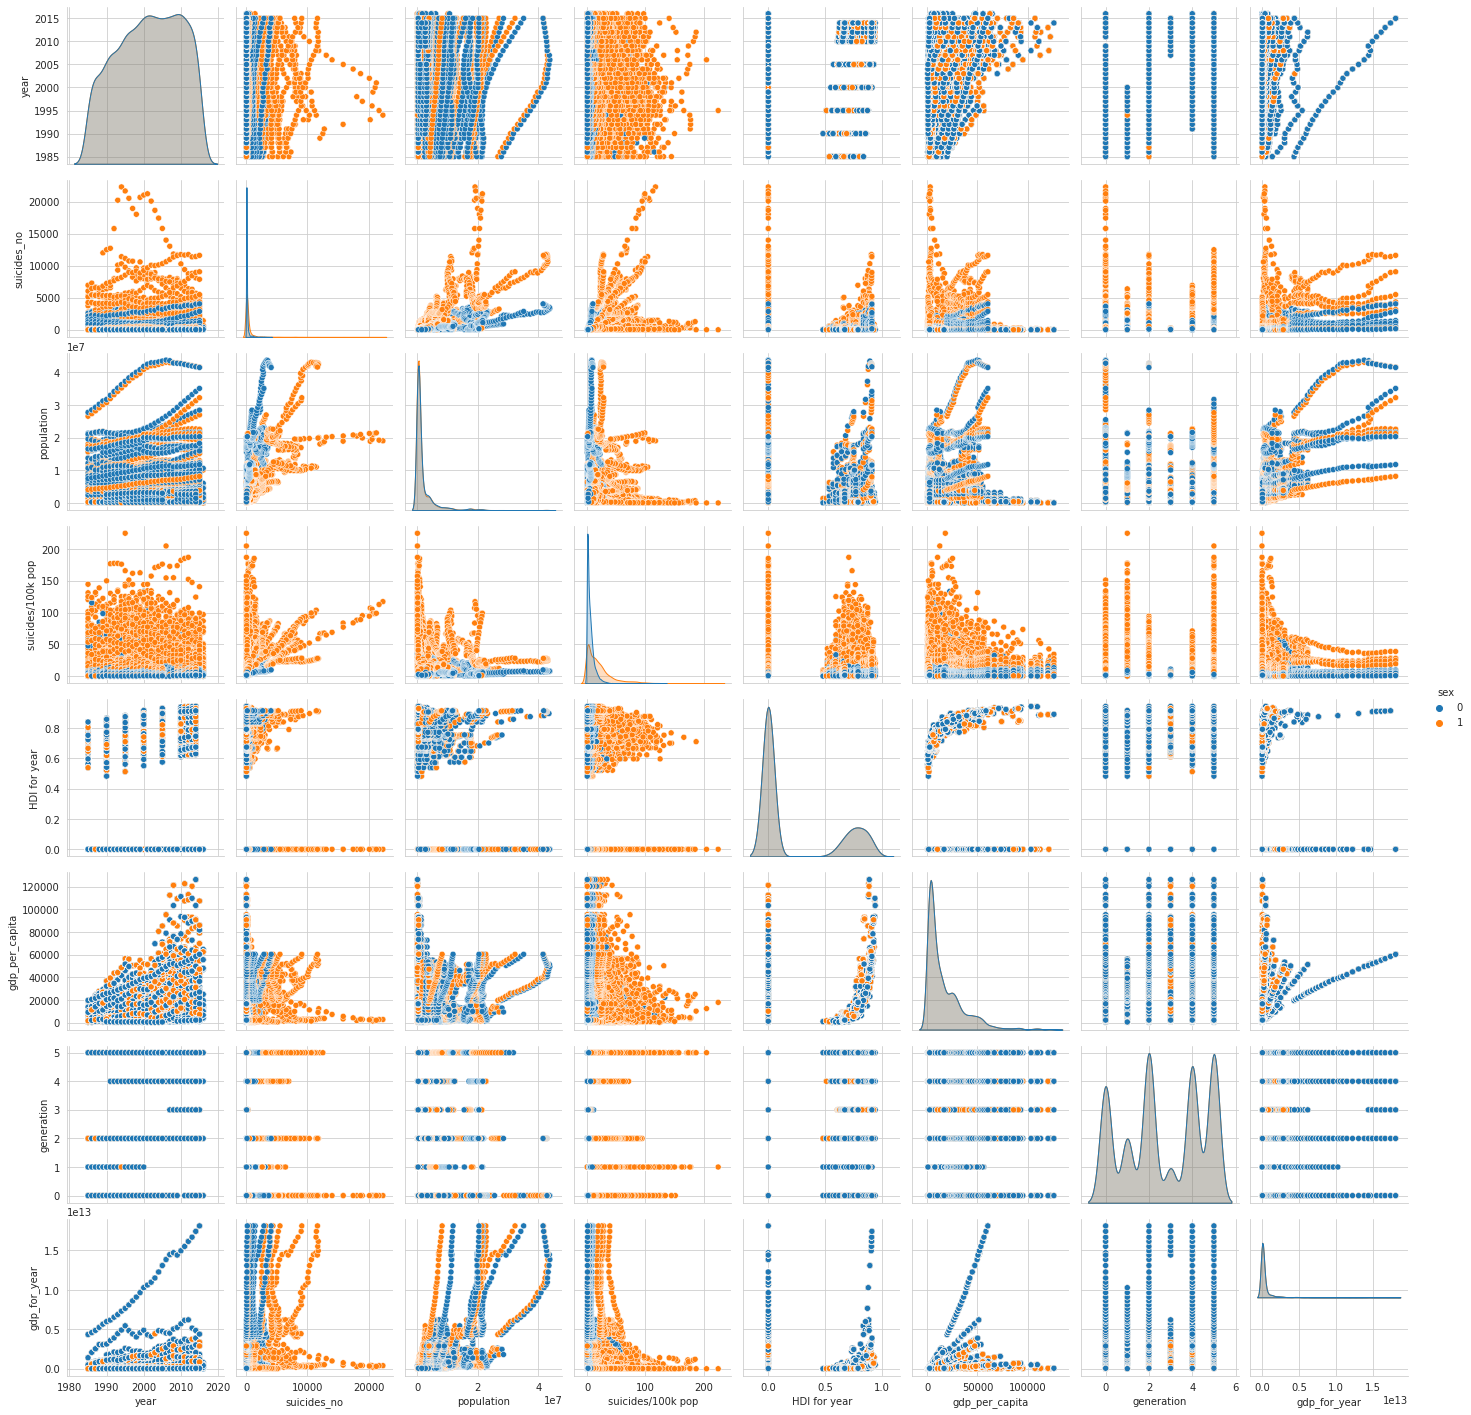

In [39]:
sns.pairplot(data=data,hue="sex")

In [ ]:
  # Machine Learning Model 
  #splitting training and testing dataset

In [41]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(train,test)

In [ ]:
#importing all the algorithm to check the Accuracy

In [40]:
#Training will be done by RandomForestAlgorithm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [42]:
#Testing on RandomForeset Regressor
alg1=RandomForestRegressor(n_estimators=50,random_state=0,criterion="mse")
alg1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [43]:
alg2=DecisionTreeRegressor()
alg2.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [44]:
#Testing on Linear Regressor
alg3=LinearRegression()
alg3.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
alg4=SVR()
alg4.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [46]:
#predicting Y values from our Given Model
y_pred_1=alg1.predict(x_test)
y_pred_2=alg2.predict(x_test)
y_pred_3=alg3.predict(x_test)
y_pred_4=alg4.predict(x_test)


In [47]:
#calculating and printing the accuracy
from sklearn import metrics
print("Random Forest RMSE ",np.sqrt(metrics.mean_squared_error(y_test,y_pred_1)))
print("Decision Tree RMSE ",np.sqrt(metrics.mean_squared_error(y_test,y_pred_2)))
print("Linear Regression RMSE ",np.sqrt(metrics.mean_squared_error(y_test,y_pred_3)))
print("SVR RMSE ",np.sqrt(metrics.mean_squared_error(y_test,y_pred_4)))

Random Forest RMSE  59.959440336478245
Decision Tree RMSE  82.54457959440441
Linear Regression RMSE  636.5053147001817
SVR RMSE  830.5911307906667
